<a href="https://colab.research.google.com/github/chohu-boraaaa/datascienceproject_boostcourse/blob/main/Diabetes_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Dataset import

In [3]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# info로 데이터타입, 결측치, 메모리 사용량 등 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 결측치 보기
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치 없음

In [8]:
# 수치데이터에 대한 요약
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# 가장 마지막에 있는 Outcome은 label 값이기 때문에 제외
# 학습과 에측에 사용할 컬럼을 만들어줌
# feature_columns라는 변수에 담아주기
feature_columns = df.columns[:-1].tolist()

# 결측치 시각화

In [10]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
# 결측치 여부를 나타내는 데이터 프레임 만들기
# 0 값을 결측치로 가정하고 정답(label, target) 값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null이라는 데이터 프레임에 담기
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [12]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

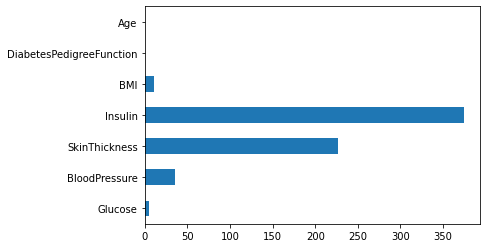

In [13]:
# 결측치의 갯수를 구해 막대 그래프로 시각화
df_null.sum().plot.barh()

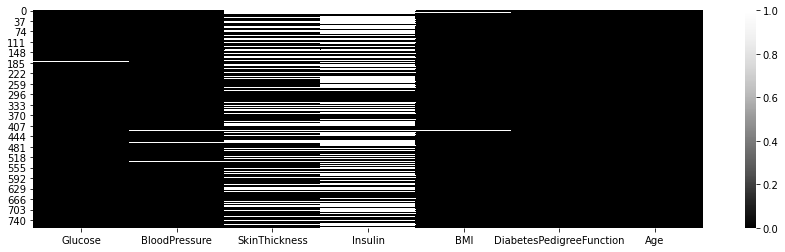

In [14]:
# 결측치를 heatmap으로 시각화
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

# 정답값

* 여기에서의 정답값은 당뇨병 발병 여부

In [15]:
# 정답값인 Outcome의 갯수를 보기
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
# Outcome 비율
df["Outcome"].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [17]:
# 다른 변수와 함께 보기
# 임신횟수와 정답값 비교
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


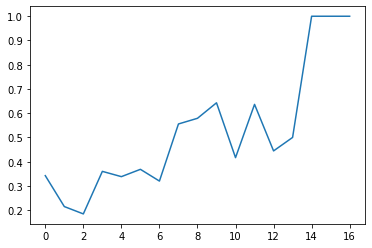

In [18]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot()

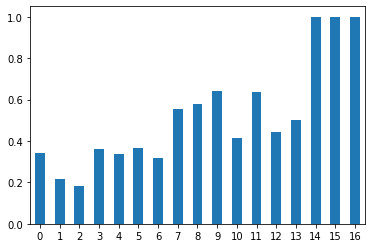

In [19]:
df_po["mean"].plot.bar(rot=0)

## countplot으로 그려보기

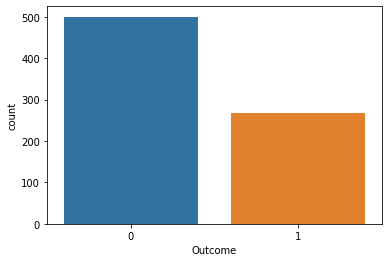

In [20]:
# 위에서 구했던 당뇨병 발병 비율 구해보기
sns.countplot(data=df, x="Outcome")

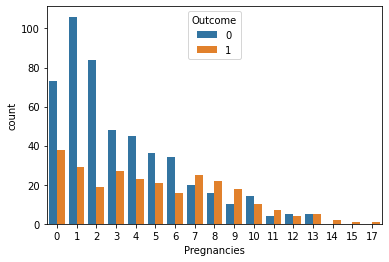

In [21]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [22]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듦
# 과적합 피하기 위해 범주화
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


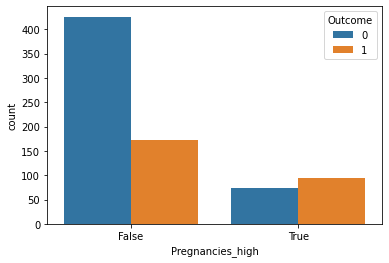

In [23]:
# Pregnant_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

## barplot으로 그려보기

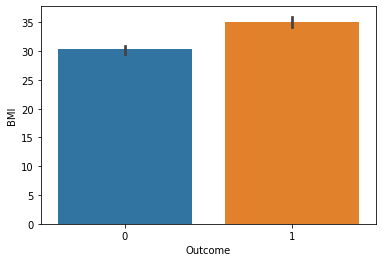

In [24]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data=df, x="Outcome", y="BMI")

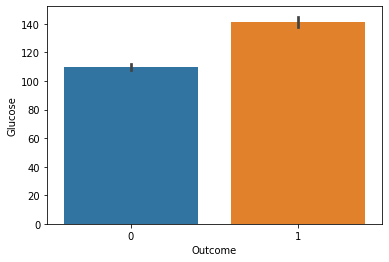

In [25]:
# 당뇨병 발병에 따른 포도당 수치 비교
sns.barplot(data=df, x="Outcome", y="Glucose")

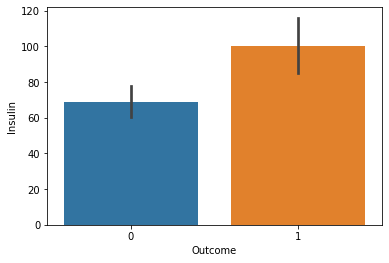

In [26]:
# Insulin 수치가 0 이상인 관측치에 대해 당뇨병 발병 비교
sns.barplot(data=df, x="Outcome", y="Insulin")

검정색 선은 95% 신뢰구간의 길이

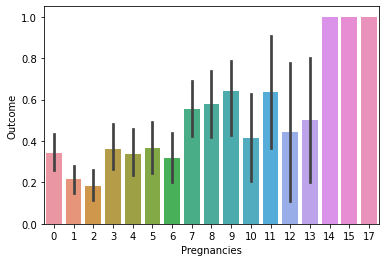

In [27]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교
sns.barplot(data=df, x="Pregnancies", y="Outcome")

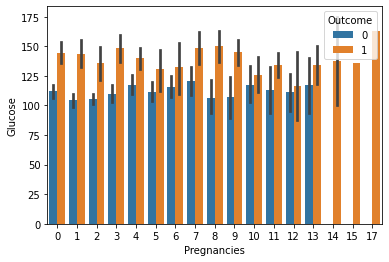

In [28]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

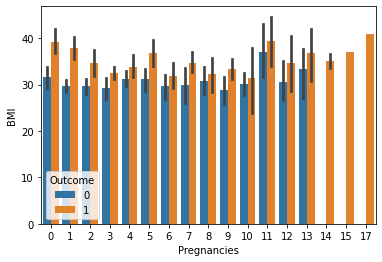

In [29]:
# 임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

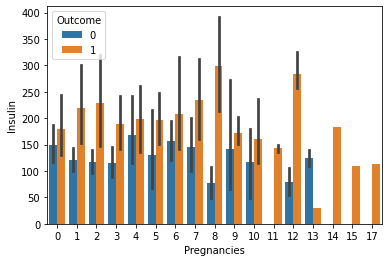

In [36]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에는 결측치가 많아 0보다 큰 값에 대해서만 그림
sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

## boxplot

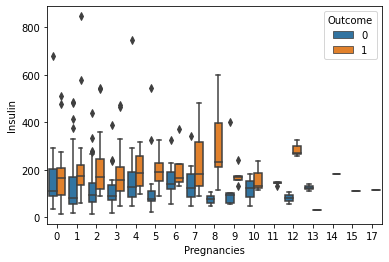

In [34]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에는 결측치가 많아 0보다 큰 값에 대해서만 그림
sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

## violinplot

- 분포확인 가능

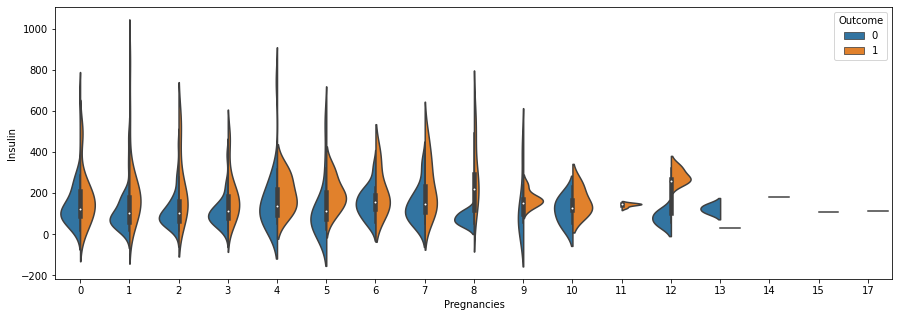

In [40]:
# 위의 그래프를 violinplot으로 시각화
plt.figure(figsize=(15,5))
sns.violinplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

## swarmplot
- 산포도 확인 가능

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


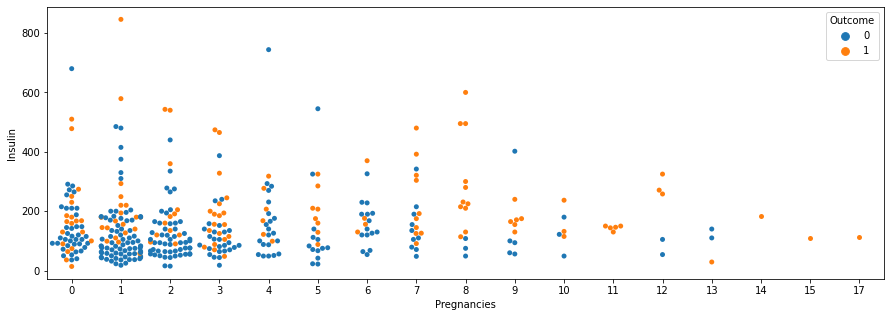

In [41]:
# 위의 그래프를 swamplot으로 시각화
plt.figure(figsize=(15,5))
sns.swarmplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

## distplot
- 연속된 수치형 데이터 시각화

In [44]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


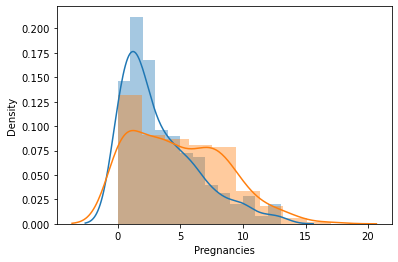

In [45]:
## 임신횟수에 따른 당뇨병 발병 여부 시각화
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

임신횟수 5회 이상이면 당뇨병 발병 케이스가 그렇지 않은 케이스보다 더 많다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

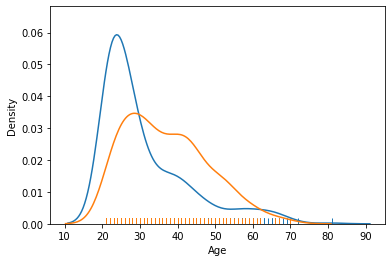

In [51]:
# 나이에 따른 당뇨병 발병여부 시각화
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

30대 이상이면 당뇨병 발병 케이스가 그렇지 않은 케이스보다 많다.

## Subplots

### Pandas를 통한 histplot 그리기
- pandas를 사용하면 모든 변수에 대한 서브플롯을 한번에 그려주기
- boolean type 지원 X

In [52]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92ad181a10>,
      dtype=object)

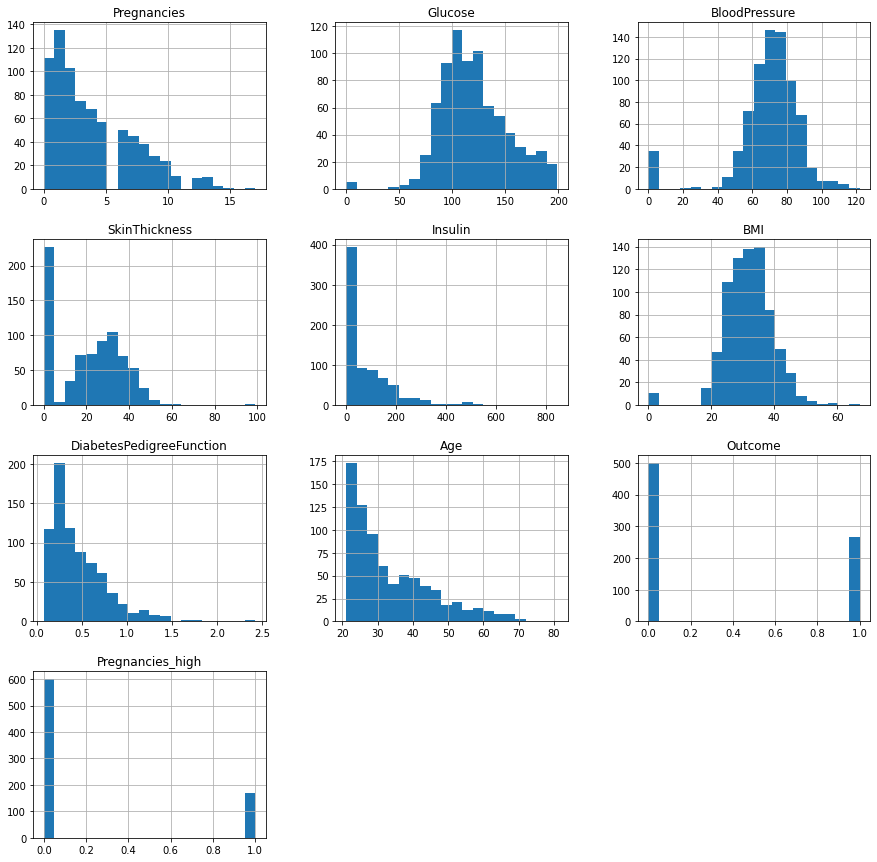

In [55]:
df.hist(figsize=(15,15), bins=20)

### 반복문을 통한 서브플롯 그리기

#### distplot

In [56]:
# 컬럼의 수 만큼 for 문 만들어서 서브플롯으로 시각화
col_num = df.columns.shape
col_num

(10,)

In [65]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

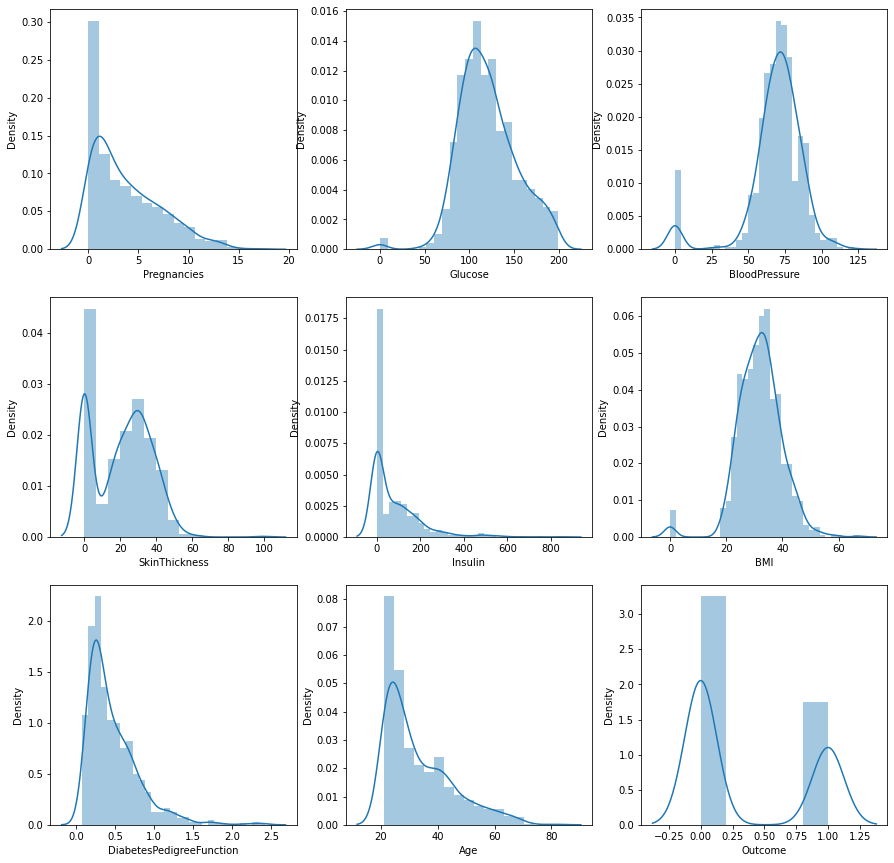

In [67]:
# displot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
  row = i // 3
  col = i % 3
  sns.distplot(df[col_name], ax=axes[row][col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

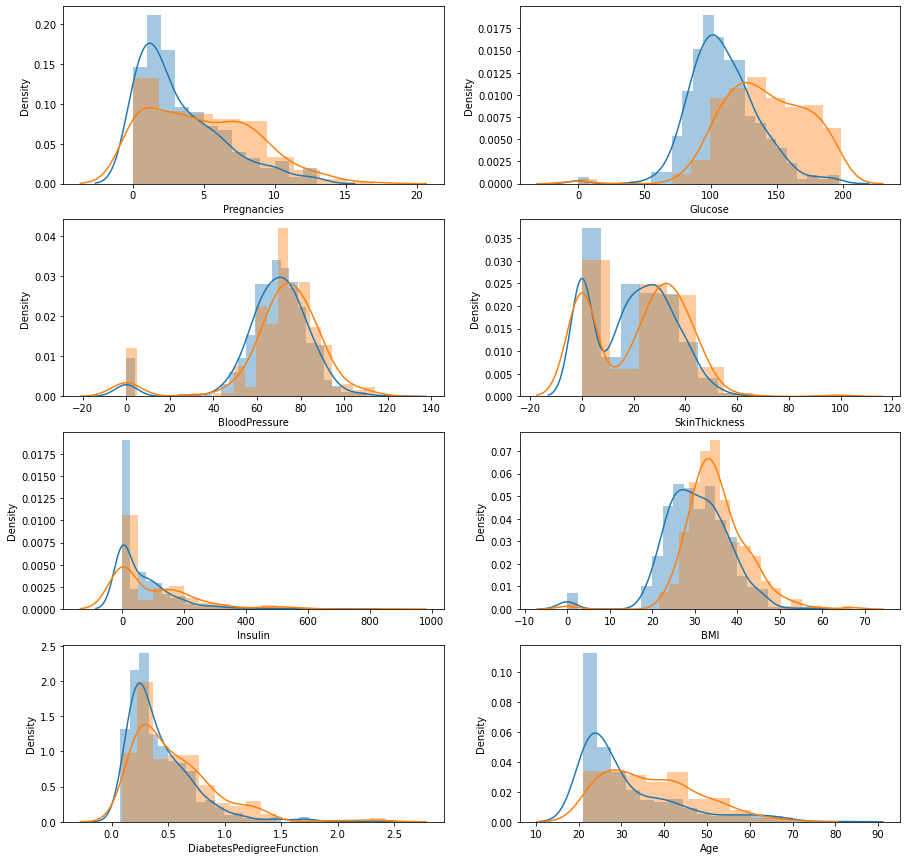

In [69]:
# displot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  sns.distplot(df_0[col_name], ax=axes[row][col])
  sns.distplot(df_1[col_name], ax=axes[row][col])